<a href="https://colab.research.google.com/github/sami-spec489/ASSIGNMENT/blob/main/Data_Visualization_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ipywidgets==7.7.1
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, clear_output


In [62]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "colab"

In [63]:
df=pd.read_excel("/content/Confectionary [4564].xlsx")

Info on the dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1001 non-null   datetime64[ns]
 1   Country(UK)    1001 non-null   object        
 2   Confectionary  1001 non-null   object        
 3   Units Sold     996 non-null    float64       
 4   Cost(£)        992 non-null    float64       
 5   Profit(£)      998 non-null    float64       
 6   Revenue(£)     1001 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 54.9+ KB


Visualization of data set head

In [65]:
df.head()

,Date,Country(UK),Confectionary,Units Sold,Cost(£),Profit(£),Revenue(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0


Droping rows with null values in Units Sold

In [66]:
df = df.dropna(subset=['Units Sold'])



Calculating proportion of data to fill missing values

In [67]:
df['proportion_of_profit'] = (df['Cost(£)'] / df['Profit(£)']) * 100


# Select only required columns
cols = ['Country(UK)', 'Confectionary', 'Cost(£)', 'Profit(£)', 'proportion_of_profit']
df_print = df[cols]

# Sample 2 rows per Confectionary per Country
df_sample = df_print.groupby(['Country(UK)', 'Confectionary']).head(2)

df_sample


,Country(UK),Confectionary,Cost(£),Profit(£),proportion_of_profit
0,England,Biscuit,2459.60,3130.40,78.571429
1,England,Biscuit,1557.60,1982.40,78.571429
10,England,Biscuit Nut,2428.50,4047.50,60.000000
11,England,Biscuit Nut,2167.50,3612.50,60.000000
25,England,Choclate Chunk,2501.25,3501.75,71.428571
...,...,...,...,...,...
775,Wales,Caramel Nut,2766.50,3269.50,84.615385
879,N. Ireland,Caramel Nut,4105.75,4852.25,84.615385
880,N. Ireland,Caramel Nut,995.50,1176.50,84.615385
984,Jersey,Caramel Nut,7757.75,9168.25,84.615385


In [68]:
df = df.dropna(subset=['proportion_of_profit'])

Filling the missing values by taking the proportion of profit

In [69]:
def fill_cost(group):
    """
    group = rows for a single combination of (Country, Confectionary)
    Missing Cost is filled using: (proportion_of_profit / 100) * Profit
    """

    mean_prop = group['proportion_of_profit'].mean()

    # Fill missing Cost = (proportion / 100) * Profit
    group['Cost(£)'] = group['Cost(£)'].fillna((mean_prop / 100) * group['Profit(£)'])

    return group

# Apply group-wise filling
df= df.groupby(['Country(UK)', 'Confectionary']).apply(fill_cost)
df = df.reset_index(drop=True)

df_sample

/tmp/ipython-input-1101069433.py:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Country(UK),Confectionary,Cost(£),Profit(£),proportion_of_profit
0,England,Biscuit,2459.60,3130.40,78.571429
1,England,Biscuit,1557.60,1982.40,78.571429
10,England,Biscuit Nut,2428.50,4047.50,60.000000
11,England,Biscuit Nut,2167.50,3612.50,60.000000
25,England,Choclate Chunk,2501.25,3501.75,71.428571
...,...,...,...,...,...
775,Wales,Caramel Nut,2766.50,3269.50,84.615385
879,N. Ireland,Caramel Nut,4105.75,4852.25,84.615385
880,N. Ireland,Caramel Nut,995.50,1176.50,84.615385
984,Jersey,Caramel Nut,7757.75,9168.25,84.615385


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  984 non-null    datetime64[ns]
 1   Country(UK)           984 non-null    object        
 2   Confectionary         984 non-null    object        
 3   Units Sold            984 non-null    float64       
 4   Cost(£)               984 non-null    float64       
 5   Profit(£)             984 non-null    float64       
 6   Revenue(£)            984 non-null    float64       
 7   proportion_of_profit  984 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 61.6+ KB


Filling missing values in Profit by taking proportion from Cost

In [71]:
def fill_profit(group):
    """
    group = rows for a single (Country, Confectionary).
    Missing Profit is filled using: Cost / (proportion/100)
    """
    # Mean proportion for this group
    mean_prop = group['proportion_of_profit'].mean()

    # Fill missing Profit = Cost / (proportion/100)
    group['Profit(£)'] = group['Profit(£)'].fillna(
        group['Cost(£)'] / (mean_prop / 100)
    )

    return group

df = df.groupby(['Country(UK)', 'Confectionary']).apply(fill_profit)
df = df.reset_index(drop=True)

df

/tmp/ipython-input-1215956983.py:16: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Date,Country(UK),Confectionary,Units Sold,Cost(£),Profit(£),Revenue(£),proportion_of_profit
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,78.571429
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,78.571429
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,78.571429
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,78.571429
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,78.571429
...,...,...,...,...,...,...,...,...
979,2004-02-03,Wales,Plain,1460.0,292.0,1168.0,1278960.0,25.000000
980,2002-12-07,Wales,Plain,645.0,129.0,516.0,249615.0,25.000000
981,2000-10-11,Wales,Plain,711.0,142.2,568.8,303312.6,25.000000
982,2001-01-26,Wales,Plain,766.0,153.2,612.8,352053.6,25.000000



Checking the logical validation of data given

In [72]:
df['Calculated_Revenue(£)'] = (df['Profit(£)'] + df['Cost(£)']) * df['Units Sold']
df.head()

,Date,Country(UK),Confectionary,Units Sold,Cost(£),Profit(£),Revenue(£),proportion_of_profit,Calculated_Revenue(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,78.571429,6249620.0
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,78.571429,2506320.0
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,78.571429,8051805.0
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,78.571429,13300805.0
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,78.571429,25088000.0


Checking for the logical validation of data given

In [73]:

df['Calculated_Revenue_per_unit_(£)'] = (df['Revenue(£)']/df['Units Sold'])
df.head()


,Date,Country(UK),Confectionary,Units Sold,Cost(£),Profit(£),Revenue(£),proportion_of_profit,Calculated_Revenue(£),Calculated_Revenue_per_unit_(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,78.571429,6249620.0,670.8
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,78.571429,2506320.0,424.8
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,78.571429,8051805.0,761.4
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,78.571429,13300805.0,978.6
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,78.571429,25088000.0,1344.0


In [74]:
# logic checking

df['SP_checking(£)'] = df['Calculated_Revenue_per_unit_(£)'] + df['Cost(£)']
df.head()


,Date,Country(UK),Confectionary,Units Sold,Cost(£),Profit(£),Revenue(£),proportion_of_profit,Calculated_Revenue(£),Calculated_Revenue_per_unit_(£),SP_checking(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,78.571429,6249620.0,670.8,3130.4
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,78.571429,2506320.0,424.8,1982.4
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,78.571429,8051805.0,761.4,3553.2
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,78.571429,13300805.0,978.6,4566.8
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,78.571429,25088000.0,1344.0,6272.0


In [75]:
df = df.rename(columns={
    'Profit(£)': 'Revenue_perunit(£)',
    'Revenue(£)': 'Revenue Old',
   'Cost(£)': 'Cost_perunit(£)'

})
df.head()
df = df.rename(columns={
    'Calculated_Revenue_per_unit_(£)': 'Profit_perunit(£)'

})
df.head()

,Date,Country(UK),Confectionary,Units Sold,Cost_perunit(£),Revenue_perunit(£),Revenue Old,proportion_of_profit,Calculated_Revenue(£),Profit_perunit(£),SP_checking(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,78.571429,6249620.0,670.8,3130.4
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,78.571429,2506320.0,424.8,1982.4
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,78.571429,8051805.0,761.4,3553.2
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,78.571429,13300805.0,978.6,4566.8
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,78.571429,25088000.0,1344.0,6272.0


In [76]:
df['Total Profit(£)'] = df['Profit_perunit(£)'] * df['Units Sold']
df.head()

,Date,Country(UK),Confectionary,Units Sold,Cost_perunit(£),Revenue_perunit(£),Revenue Old,proportion_of_profit,Calculated_Revenue(£),Profit_perunit(£),SP_checking(£),Total Profit(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,78.571429,6249620.0,670.8,3130.4,749954.4
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,78.571429,2506320.0,424.8,1982.4,300758.4
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,78.571429,8051805.0,761.4,3553.2,966216.6
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,78.571429,13300805.0,978.6,4566.8,1596096.6
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,78.571429,25088000.0,1344.0,6272.0,3010560.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   984 non-null    datetime64[ns]
 1   Country(UK)            984 non-null    object        
 2   Confectionary          984 non-null    object        
 3   Units Sold             984 non-null    float64       
 4   Cost_perunit(£)        984 non-null    float64       
 5   Revenue_perunit(£)     984 non-null    float64       
 6   Revenue Old            984 non-null    float64       
 7   proportion_of_profit   984 non-null    float64       
 8   Calculated_Revenue(£)  984 non-null    float64       
 9   Profit_perunit(£)      984 non-null    float64       
 10  SP_checking(£)         984 non-null    float64       
 11  Total Profit(£)        984 non-null    float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 92.4+ 

Caclulationg total cost and total revenue

In [78]:
df['Total_Cost(£)'] = df['Cost_perunit(£)'] * df['Units Sold']
df['Total_Revenue(£)'] = df['Revenue_perunit(£)'] * df['Units Sold']
df.head()

,Date,Country(UK),Confectionary,Units Sold,Cost_perunit(£),Revenue_perunit(£),Revenue Old,proportion_of_profit,Calculated_Revenue(£),Profit_perunit(£),SP_checking(£),Total Profit(£),Total_Cost(£),Total_Revenue(£)
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,78.571429,6249620.0,670.8,3130.4,749954.4,2749832.8,3499787.2
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,78.571429,2506320.0,424.8,1982.4,300758.4,1102780.8,1403539.2
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,78.571429,8051805.0,761.4,3553.2,966216.6,3542794.2,4509010.8
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,78.571429,13300805.0,978.6,4566.8,1596096.6,5852354.2,7448450.8
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,78.571429,25088000.0,1344.0,6272.0,3010560.0,11038720.0,14049280.0


Pivot table view

In [79]:
profit_by_confectionary_country = df.groupby(['Confectionary', 'Country(UK)'])['Profit_perunit(£)'].sum()
print(profit_by_confectionary_country)

Confectionary    Country(UK)
Biscuit          England          9885.0
                 Jersey          33024.0
                 N. Ireland      26559.6
                 Scotland        31597.2
                 Wales           27307.2
Biscuit Nut      England         23952.0
                 Jersey          41927.0
                 N. Ireland      38004.0
                 Scotland        56418.0
                 Wales           41637.0
Caramel          England        136092.5
                 Jersey         114498.0
                 N. Ireland      94468.0
                 Scotland       112194.0
                 Wales           74976.0
Caramel Nut      Jersey          12817.5
                 N. Ireland      10123.5
                 Scotland        12779.5
                 Wales           11745.5
Caramel nut      England         11807.5
                 Jersey          11440.0
                 N. Ireland      10123.5
                 Scotland        14192.5
                 Wales      

Unique items in Countries and Confectionary Items in Data Set

In [80]:
print("Unique Countries:")
print(df['Country(UK)'].unique())

print("\nUnique Confectionary Items:")
print(df['Confectionary'].unique())

Unique Countries:
['England' 'Jersey' 'N. Ireland' 'Scotland' 'Wales']

Unique Confectionary Items:
['Biscuit' 'Biscuit Nut' 'Caramel' 'Caramel nut' 'Choclate Chunk'
 'Caramel Nut' 'Plain' 'Chocolate Chunk']


# REplacing Caramel nut with Caramel Nut

In [81]:
df['Confectionary'] = df['Confectionary'].str.replace('Caramel nut', 'Caramel Nut')
df['Confectionary'] = df['Confectionary'].str.replace('Choclate Chunk', 'Chocolate Chunk')



In [82]:
df['Confectionary'] = df['Confectionary'].str.replace('Caramel nut', 'Caramel Nut')
df['Confectionary'] = df['Confectionary'].str.replace('Choclate Chunk', 'Chocolate Chunk')
print("Unique Confectionary Items after correction:")
print(df['Confectionary'].unique())

Unique Confectionary Items after correction:
['Biscuit' 'Biscuit Nut' 'Caramel' 'Caramel Nut' 'Chocolate Chunk' 'Plain']


In [83]:

# Ensure Date column is datetime and Year is extracted
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Aggregate total Cost and Profit per year
financial_data_by_year = df.groupby('Year', as_index=False)[['Total_Cost(£)', 'Total Profit(£)']].sum()


fig = go.Figure()

# Add trace for Total Cost
fig.add_trace(go.Scatter(
    x=financial_data_by_year['Year'],
    y=financial_data_by_year['Total_Cost(£)'],
    mode='lines+markers',
    name='Total Cost (£)'
))

# Add trace for Total Profit
fig.add_trace(go.Scatter(
    x=financial_data_by_year['Year'],
    y=financial_data_by_year['Total Profit(£)'],
    mode='lines+markers',
    name='Total Profit (£)'
))

fig.update_layout(
    title='Total Cost and Total Profit Over the Years',
    xaxis_title='Year',
    yaxis_title='Amount (£)',
    hovermode='x unified'
)

fig.show()

In [84]:


# Ensure Date column is datetime and Year is extracted
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Aggregate all three financial metrics per year
financial_data_by_year = df.groupby('Year', as_index=False)[
    ['Total_Revenue(£)', 'Total_Cost(£)', 'Total Profit(£)']
].sum()

# Convert amounts to millions
financial_data_by_year['Total_Revenue(£)'] = financial_data_by_year['Total_Revenue(£)'] / 1_000_000
financial_data_by_year['Total_Cost(£)'] = financial_data_by_year['Total_Cost(£)'] / 1_000_000
financial_data_by_year['Total Profit(£)'] = financial_data_by_year['Total Profit(£)'] / 1_000_000

# Create a single figure
fig = go.Figure()

# Add Scatter trace for Total Revenue (changed from Bar)
fig.add_trace(go.Bar(
    x=financial_data_by_year['Year'],
    y=financial_data_by_year['Total_Revenue(£)'],
    name='Total Revenue (£ Millions)',
    marker=dict(color='skyblue'),
    width=0.6,

       # color for the bar
))

# Add Scatter trace for Total Cost
fig.add_trace(go.Scatter(
    x=financial_data_by_year['Year'],
    y=financial_data_by_year['Total_Cost(£)'],
    mode='lines+markers',
    name='Total Cost (£ Millions)',
    line=dict(color='Red')
))

# Add Scatter trace for Total Profit
fig.add_trace(go.Scatter(
    x=financial_data_by_year['Year'],
    y=financial_data_by_year['Total Profit(£)'],
    mode='lines+markers',
    name='Total Profit (£ Millions)',
    line=dict(color='green')
))

# Update layout
fig.update_layout(
    title='Total Revenue, Cost, and Profit Over the Years',
    xaxis_title='Year',
    yaxis_title='Amount (£ Millions)',
    hovermode='x unified',
    yaxis=dict(range=[50, financial_data_by_year[['Total_Revenue(£)', 'Total_Cost(£)', 'Total Profit(£)']].max().max() * 1.1]), # Start y-axis from 50 million
    bargroupgap=0.0
)


fig.show()

Visualizing total profit by country

In [85]:
import plotly.express as px

# Color-blind–safe palette
country_colors = {
    'England': '#4E79A7',       # Blue
    'Jersey': '#F28E2B',        # Orange
    'N. Ireland': '#E15759',    # Brick Red
    'Scotland': '#76B7B2',      # Teal
    'Wales': '#59A14F'          # Green
}

# Convert to millions
df["Revenue_Million"] = df["Total_Revenue(£)"] / 1_000_000
df["Profit_Million"] = df["Total Profit(£)"] / 1_000_000

fig_bubble_total = px.scatter(
    df,
    x="Revenue_Million",
    y="Profit_Million",
    size="Revenue_Million",
    color="Country(UK)",
    color_discrete_map=country_colors,   # ← apply custom colors
    hover_name="Confectionary",
    title="Bubble Chart: Revenue vs Profit for Entire Dataset (£ Millions)"
)

fig_bubble_total.update_layout(
    xaxis_title="Total Revenue (Millions £)",
    yaxis_title="Total Profit (Millions £)",
    legend_title="Country"
)

fig_bubble_total.show()


BUBBLE CHART SHOWING TOTAL REVENUE VS TOTAL PROFIT OF THE DATASET PERIOD BY COUNTRY

In [86]:
country_colors = {
    'England': '#FF6F91',
    'Jersey': '#FFE066',
    'N. Ireland': '#2EC4B6',
    'Scotland': '#4D96FF',
    'Wales': '#9BDE7E'
}

country_summary = df.groupby("Country(UK)", as_index=False).agg({
    "Total_Revenue(£)": "sum",
    "Total Profit(£)": "sum"
})

country_summary["Revenue_Million"] = country_summary["Total_Revenue(£)"] / 1_000_000
country_summary["Profit_Million"]  = country_summary["Total Profit(£)"] / 1_000_000

fig_country_bubble = px.scatter(
    country_summary,
    x="Revenue_Million",
    y="Profit_Million",
    size="Profit_Million",
    color="Country(UK)",
    color_discrete_map=country_colors,
    hover_name="Country(UK)",
    title="Bubble Chart: Total Revenue vs Total Profit by Country (£ Millions)"
)

fig_country_bubble.update_layout(
    xaxis_title="Total Revenue (Millions £)",
    yaxis_title="Total Profit (Millions £)",
    legend_title="Country"
)

fig_country_bubble.show()


LINE CHART SHOWING TOTAL REVENUE PER COUNTRY WITH DROPWDOWN

In [87]:
country_revenue = df.groupby(['Year', 'Country(UK)'], as_index=False)['Total_Revenue(£)'].sum()
country_revenue['Revenue_Million'] = country_revenue['Total_Revenue(£)'] / 1_000_000
color_map = {
     'England': '#CC5673',
    'Jersey': '#CCB352',
    'N. Ireland': '#249A90',
    'Scotland': '#3D78CC',
    'Wales': '#79B265'
}


countries = country_revenue['Country(UK)'].unique()


fig = go.Figure()

for country in countries:
    temp_df = country_revenue[country_revenue['Country(UK)'] == country]
    fig.add_trace(go.Scatter(
        x=temp_df['Year'],
        y=temp_df['Revenue_Million'],
        mode='lines+markers',
        name=country,
        visible=True,
        line=dict(color=color_map.get(country, '#000000'))  # fallback black
    ))


# Dropdown buttons
buttons = []


for i, country in enumerate(countries):
    visible_state = [False] * len(countries)
    visible_state[i] = True
    buttons.append(dict(
        label=country,
        method="update",
        args=[{"visible": visible_state},
              {"title": f"Total Revenue per Year — {country} (£ Millions)"}]
    ))


buttons.insert(0, dict(
    label="All",
    method="update",
    args=[{"visible": [True] * len(countries)},
          {"title": "Total Revenue per Year by Country (£ Millions)"}]
))
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.25,
        y=1,
        xanchor='right',
        yanchor='top'
    )],
    xaxis_title='Year',
    yaxis_title='Revenue (£ Millions)',
    title='Total Revenue per Year by Country (£ Millions)',
    legend_title='Country'
)

fig.show()


LINE CHART SHOWING PROFIT MARGIN BY COUNTRY

In [88]:


color_map = {
    'England': '#CC5673',
    'Jersey': '#CCB352',
    'N. Ireland': '#249A90',
    'Scotland': '#3D78CC',
    'Wales': '#79B265'
}

country_margin = df.groupby(['Year', 'Country(UK)'], as_index=False).agg({
    'Total Profit(£)': 'sum',
    'Total_Revenue(£)': 'sum'
})

country_margin['Profit_Margin_%'] = (
    country_margin['Total Profit(£)'] / country_margin['Total_Revenue(£)']
) * 100

countries = country_margin['Country(UK)'].unique()

fig = go.Figure()

for country in countries:
    temp = country_margin[country_margin['Country(UK)'] == country]

    fig.add_trace(go.Scatter(
        x=temp['Year'],
        y=temp['Profit_Margin_%'],
        mode='lines+markers',
        name=country,
        line=dict(color=color_map[country], width=3),
        marker=dict(color=color_map[country], size=8),
        visible=True
    ))

buttons = []

for i, country in enumerate(countries):
    visible = [False] * len(countries)
    visible[i] = True

    buttons.append(dict(
        label=country,
        method="update",
        args=[{"visible": visible},
              {"title": f"Profit Margin per Year – {country}"}]
    ))

buttons.insert(0, dict(
    label="All",
    method="update",
    args=[{"visible": [True]*len(countries)},
          {"title": "Profit Margin per Year by Country (%)"}]
))

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.18,
        y=1,
        xanchor='right',
        yanchor='top'
    )],
    xaxis_title='Year',
    yaxis_title='Profit Margin (%)',
    legend_title='Country',
    title='Profit Margin per Year by Country (%)'
)

fig.show()


LINE CHART SHOWING PROFIT TREND OF COMPANY OVER THE DATASET

In [89]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year
df['Year'] = df['Date'].dt.year

# Aggregate total profit per year
profit_by_year = df.groupby('Year', as_index=False)['Total Profit(£)'].sum()

# Create line chart
fig = px.line(
    profit_by_year,
    x='Year',
    y='Total Profit(£)',

    title='Profit Over Years',
    markers=True
)

fig.update_layout(
    xaxis_title='Profit (£)',
    yaxis_title='Year'
)

fig.show()

GROUPED BAR CHART SHOWING PROFIT PER YEAR BY COUNTRY

In [90]:


country_profit = df.groupby(['Year', 'Country(UK)'], as_index=False)['Total Profit(£)'].sum()
country_profit['Profit_Million'] = country_profit['Total Profit(£)'] / 1_000_000

pivot_df = country_profit.pivot(index='Year', columns='Country(UK)', values='Profit_Million').fillna(0)
pivot_df = pivot_df.reset_index()

plot_df = pivot_df.melt(id_vars='Year', var_name='Country', value_name='Profit_Million')

plot_df = plot_df.sort_values(['Year', 'Profit_Million'], ascending=[True, False])

color_map = {
    'England': '#FF6F91',
    'Jersey': '#FFE066',
    'N. Ireland': '#2EC4B6',
    'Scotland': '#4D96FF',
    'Wales': '#9BDE7E'
}

fig = px.bar(
    plot_df,
    x='Year',
    y='Profit_Million',
    color='Country',
    barmode='group',
    title='Grouped Bar Chart – Profit per Year by Country (£ Millions)',
    color_discrete_map=color_map
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Profit (£ Millions)',
    legend_title='Country',
    bargroupgap=0.15,
    bargap=0.3
)

fig.update_traces(text=None)

fig.show()


BAR CHART SHOWING PROFIT PER YEAR BY COUNTRY

In [91]:
country_profit = df.groupby(['Year', 'Country(UK)'], as_index=False)['Total Profit(£)'].sum()
country_profit['Profit_Million'] = country_profit['Total Profit(£)'] / 1_000_000

pivot_df = country_profit.pivot(index='Year', columns='Country(UK)', values='Profit_Million').fillna(0)
pivot_df = pivot_df.reset_index()

plot_df = pivot_df.melt(id_vars='Year', var_name='Country', value_name='Profit_Million')

color_map = {
    'England': '#FF6F91',
    'Jersey': '#FFE066',
    'N. Ireland': '#2EC4B6',
    'Scotland': '#4D96FF',
    'Wales': '#9BDE7E'
}

fig = px.bar(
    plot_df,
    y='Year',
    x='Profit_Million',
    color='Country',
    text='Profit_Million',
    orientation='h',
    title='Profit per Year by Country (£ Millions)',
    color_discrete_map=color_map
)

fig.update_layout(
    xaxis_title='Profit (£ Millions)',
    yaxis_title='Year',
    barmode='stack',
    legend_title='Country'
)

fig.update_traces(texttemplate='%{text:.0f}', textposition='inside')

fig.show()


TOTAL PROFIT PER YEAR BY CONFECTIONARY

In [92]:
confect_profit = df.groupby(['Year', 'Confectionary'], as_index=False)['Total Profit(£)'].sum()
confect_profit['Profit_Million'] = confect_profit['Total Profit(£)'] / 1_000_000

plot_df = confect_profit.copy()
plot_df.columns = plot_df.columns.str.strip()

confect_order_desc = (
    plot_df.groupby('Confectionary')['Profit_Million']
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

confect_order_desc = [c for c in confect_order_desc if c in plot_df['Confectionary'].unique()]

color_map = {
    'Biscuit': '#FFD580',
    'Biscuit Nut': '#B3CDE3',
    'Caramel': '#FFD700',
    'Caramel Nut': '#FFA07A',
    'Chocolate Chunk': '#4B3621',
    'Plain': '#FAFAD2'
}

fig = px.bar(
    plot_df,
    x='Year',
    y='Profit_Million',
    color='Confectionary',
    title='Profit per Year by Confectionary (£ Millions)',
    barmode='group',
    category_orders={'Confectionary': confect_order_desc},
    color_discrete_map=color_map
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Profit (£ Millions)',
    height=550,
    width=900,
    legend_title='Confectionary'
)

fig.show()


LINE CHART, PROFIT PER YEAR BY CONFECTIONARY

In [93]:


colors = {
    'Biscuit': '#E6A84C',
    'Biscuit Nut': '#7FA6C4',
    'Caramel': '#CCAC00',
    'Caramel Nut': '#E07A52',
    'Chocolate Chunk': '#2E2116',
    'Plain': '#D6D39A'
}

confect_profit = df.groupby(['Year', 'Confectionary'], as_index=False)['Total Profit(£)'].sum()
confect_profit['Profit_Million'] = confect_profit['Total Profit(£)'] / 1_000_000

confect_list = confect_profit['Confectionary'].unique()

fig = go.Figure()

for confection in confect_list:
    df_temp = confect_profit[confect_profit['Confectionary'] == confection]
    fig.add_trace(go.Scatter(
        x=df_temp['Year'],
        y=df_temp['Profit_Million'],
        mode='lines+markers',
        name=confection,
        visible=True,
        line=dict(color=colors[confection], width=3),
        marker=dict(color=colors[confection], size=8)
    ))

buttons = []

for i, confection in enumerate(confect_list):
    visible = [False] * len(confect_list)
    visible[i] = True
    buttons.append(dict(
        label=confection,
        method="update",
        args=[{"visible": visible},
              {"title": f"Profit per Year: {confection} (£ Millions)"}]
    ))

buttons.insert(0, dict(
    label="All",
    method="update",
    args=[{"visible": [True]*len(confect_list)},
          {"title": "Profit per Year by Confectionary (£ Millions)"}]
))

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.15,
        y=1,
        xanchor='right',
        yanchor='top'
    )],
    xaxis_title='Year',
    yaxis_title='Profit (£ Millions)',
    legend_title='Confectionary',
    title='Profit per Year by Confectionary (£ Millions)'
)

fig.show()


LINE CHART, PROFIT MARGIN PER CONFECTIONARY

In [94]:
colors = {
    'Biscuit': '#E6A84C',
    'Biscuit Nut': '#7FA6C4',
    'Caramel': '#CCAC00',
    'Caramel Nut': '#E07A52',
    'Chocolate Chunk': '#2E2116',
    'Plain': '#D6D39A'
}

df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

confect_margin = df.groupby(['Year', 'Confectionary'], as_index=False).agg({
    'Total Profit(£)': 'sum',
    'Total_Revenue(£)': 'sum'
})

confect_margin['Profit_Margin_%'] = (
    confect_margin['Total Profit(£)'] / confect_margin['Total_Revenue(£)']
) * 100

confect_list = confect_margin['Confectionary'].unique()

fig = go.Figure()

for confection in confect_list:
    df_temp = confect_margin[confect_margin['Confectionary'] == confection]
    fig.add_trace(go.Scatter(
        x=df_temp['Year'],
        y=df_temp['Profit_Margin_%'],
        mode='lines+markers',
        name=confection,
        visible=True,
        line=dict(color=colors[confection], width=3),
        marker=dict(color=colors[confection], size=8)
    ))

buttons = []

for i, confection in enumerate(confect_list):
    visible = [False] * len(confect_list)
    visible[i] = True
    buttons.append(dict(
        label=confection,
        method="update",
        args=[{"visible": visible},
              {"title": f"Profit Margin per Year: {confection} (%)"}]
    ))

buttons.insert(0, dict(
    label="All",
    method="update",
    args=[{"visible": [True]*len(confect_list)},
          {"title": "Profit Margin per Year by Confectionary (%)"}]
))

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.15,
        y=1,
        xanchor='right',
        yanchor='top'
    )],
    xaxis_title='Year',
    yaxis_title='Profit Margin (%)',
    legend_title='Confectionary',
    title='Profit Margin per Year by Confectionary (%)'
)

fig.show()


PROFIT REVENUE AND COST LINE CHART OVER THE YEARS PER COUNTRY

In [95]:
def plot_country_profit(df, country_name):

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year

    country_df = df[df['Country(UK)'] == country_name]

    yearly = (
        country_df
        .groupby('Year', as_index=False)
        .agg({
            'Total Profit(£)': 'sum',
            'Total_Revenue(£)': 'sum',
            'Total_Cost(£)': 'sum'
        })
    )

    fig = px.line(
        yearly,
        x='Year',
        y=['Total Profit(£)', 'Total_Revenue(£)', 'Total_Cost(£)'],
        title=f'{country_name} – Profit, Revenue & Cost Trends Over the Years',
        markers=True
    )

    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Amount (£)',
        legend_title='Metric'
    )

    fig.show()


countries = ["England", "Scotland", "Wales", "N. Ireland", "Jersey"]

for c in countries:
    plot_country_profit(df, c)


LINE CHART SHOWING REVENUE AND PROFIT TREND PER COUNTRY

In [96]:


def plot_country_profit(df, country_name):

    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year

    country_df = df[df['Country(UK)'] == country_name]

    yearly = (
        country_df
        .groupby('Year', as_index=False)
        .agg({
            'Total Profit(£)': 'sum',
            'Total_Revenue(£)': 'sum'
        })
    )

    yearly['Profit_Margin_%'] = (yearly['Total Profit(£)'] / yearly['Total_Revenue(£)']) * 100

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=yearly['Year'],
        y=yearly['Total_Revenue(£)'],
        mode='lines+markers',
        name='Revenue (£)',
        line=dict(color='#4E79A7'),
        marker=dict(color='#4E79A7')
    ))

    fig.add_trace(go.Scatter(
        x=yearly['Year'],
        y=yearly['Profit_Margin_%'],
        mode='lines+markers',
        name='Profit Margin (%)',
        yaxis='y2',
        line=dict(color='#FFD700'),
        marker=dict(color='#FFD700')
    ))

    fig.update_layout(
        title=f'{country_name} – Revenue & Profit Margin Trend',
        xaxis=dict(title='Year'),
        yaxis=dict(title='Revenue (£)'),
        yaxis2=dict(
            title='Profit Margin (%)',
            overlaying='y',
            side='right',
            showgrid=False
        ),
        legend_title='Metric'
    )

    fig.show()


countries = ["England", "Scotland", "Wales", "N. Ireland", "Jersey"]

for c in countries:
    plot_country_profit(df, c)


BUBBLE CHART SHOWING TOTAL REVENUE VS PROFIT OF CONFECTIONARY

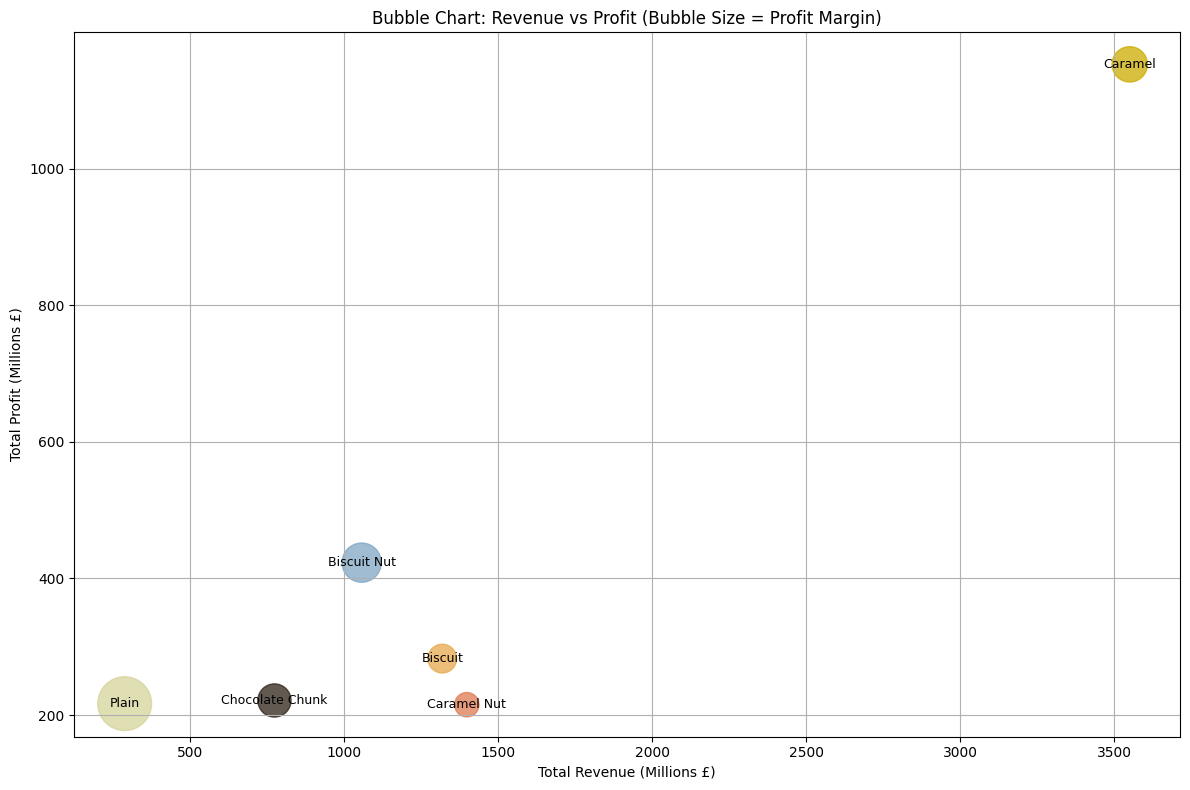

In [97]:


confectionary_summary = df.groupby('Confectionary')[['Total Profit(£)', 'Total_Revenue(£)']].sum()
confectionary_summary['Profit Margin'] = (confectionary_summary['Total Profit(£)'] / confectionary_summary['Total_Revenue(£)']) * 100

x = confectionary_summary["Total_Revenue(£)"] / 1_000_000
y = confectionary_summary["Total Profit(£)"] / 1_000_000
sizes = confectionary_summary["Profit Margin"] * 20
labels = confectionary_summary.index.get_level_values('Confectionary')

colors = {
    'Biscuit': '#E6A84C',
    'Biscuit Nut': '#7FA6C4',
    'Caramel': '#CCAC00',
    'Caramel Nut': '#E07A52',
    'Chocolate Chunk': '#2E2116',
    'Plain': '#D6D39A'
}

plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=sizes, c=[colors[label] for label in labels], alpha=0.75)

for i, txt in enumerate(labels):
    plt.text(x.iloc[i], y.iloc[i], txt, fontsize=9, ha='center', va='center')

plt.xlabel("Total Revenue (Millions £)")
plt.ylabel("Total Profit (Millions £)")
plt.title("Bubble Chart: Revenue vs Profit (Bubble Size = Profit Margin)")
plt.grid(True)
plt.tight_layout()
plt.show()

GROUPED BAR CHART SHOWING CONFECTIONARY WISE TOTAL REVENUE PER COUNTRY PER YEAR

In [98]:
confectionary_colors = {
    'Biscuit': '#FFD580',
    'Biscuit Nut': '#B3CDE3',
    'Caramel': '#FFD700',
    'Caramel Nut': '#FFA07A',
    'Chocolate Chunk': '#4B3621',
    'Plain': '#FAFAD2'
}

def plot_country_confectionary(df, country):

    country_df = df[df['Country(UK)'] == country]

    agg_df = country_df.groupby(['Year', 'Confectionary'], as_index=False)['Total_Revenue(£)'].sum()

    agg_df['Revenue_Million'] = agg_df['Total_Revenue(£)'] / 1_000_000

    agg_df = agg_df.sort_values(
        by=['Year', 'Revenue_Million'],
        ascending=[True, False]
    )

    fig = px.bar(
        agg_df,
        x='Year',
        y='Revenue_Million',
        color='Confectionary',
        barmode='group',
        title=f'Total Revenue per Year by Confectionary in {country} (£ Millions)',
        color_discrete_map=confectionary_colors
    )

    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Revenue (£ Millions)',
        legend_title='Confectionary',
        xaxis=dict(tickmode='linear'),
        bargap=0.2,
        bargroupgap=0
    )

    fig.show()

for country in df['Country(UK)'].unique():
    plot_country_confectionary(df, country)


GROUPED BAR CHART SHOWING CONFECTIONARY WISE PROFIT PER COUNTRY PER YEAR

---



In [99]:
confectionary_colors = {
     'Biscuit': '#FFD580',
    'Biscuit Nut': '#B3CDE3',
    'Caramel': '#FFD700',
    'Caramel Nut': '#FFA07A',
    'Chocolate Chunk': '#4B3621',
    'Plain': '#FAFAD2'

}

def plot_country_confectionary(df, country):

    country_df = df[df['Country(UK)'] == country]

    agg_df = country_df.groupby(['Year', 'Confectionary'], as_index=False)['Total Profit(£)'].sum()

    agg_df['Profit_Million'] = agg_df['Total Profit(£)'] / 1_000_000

    agg_df = agg_df.sort_values(
        by=['Year', 'Profit_Million'],
        ascending=[True, False]
    )

    fig = px.bar(
        agg_df,
        x='Year',
        y='Profit_Million',
        color='Confectionary',
        barmode='group',
        #text='Profit_Million',
        title=f'Profit per Year by Confectionary in {country} (£ Millions)',
        color_discrete_map=confectionary_colors
    )

    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Profit (£ Millions)',
        legend_title='Confectionary',
        xaxis=dict(tickmode='linear'),
        bargap=0.2,
        bargroupgap=0
    )

    #fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')

    fig.show()

for country in df['Country(UK)'].unique():
    plot_country_confectionary(df, country)


BUBBLE CHART, TOTAL REVENUE VS TOTAL PROFIT BY COUNTRY

In [100]:

country_colors = {
    'England': '#4E79A7',       # Blue
    'Jersey': '#F28E2B',        # Orange
    'N. Ireland': '#E15759',    # Brick Red
    'Scotland': '#76B7B2',      # Teal
    'Wales': '#59A14F'          # Green
}

# Aggregate totals by country
country_summary = df.groupby("Country(UK)", as_index=False).agg({
    "Total_Revenue(£)": "sum",
    "Total Profit(£)": "sum"
})

# Convert to millions
country_summary["Revenue_Million"] = country_summary["Total_Revenue(£)"] / 1_000_000
country_summary["Profit_Million"]  = country_summary["Total Profit(£)"] / 1_000_000

# Bubble chart
fig_country_bubble = px.scatter(
    country_summary,
    x="Revenue_Million",
    y="Profit_Million",
    size="Profit_Million",
    color="Country(UK)",
    color_discrete_map=country_colors,
    hover_name="Country(UK)",
    title="Bubble Chart: Total Revenue vs Total Profit by Country (£ Millions)"
)

fig_country_bubble.update_layout(
    xaxis_title="Total Revenue (Millions £)",
    yaxis_title="Total Profit (Millions £)",
    legend_title="Country"
)

fig_country_bubble.show()


LINE CHART, PROFIT PER YEAR BY CONFECTIONARY

In [101]:


colors = {
    'Biscuit': '#B97A12',
    'Biscuit Nut': '#4F6E8E',
    'Caramel': '#8A7C00',
    'Caramel Nut': '#B2542F',
    'Chocolate Chunk': '#1A130C',
    'Plain': '#A39E63'
}

confect_list = confect_profit['Confectionary'].unique()

fig = go.Figure()

for confection in confect_list:
    df_temp = confect_profit[confect_profit['Confectionary'] == confection]
    fig.add_trace(go.Scatter(
        x=df_temp['Year'],
        y=df_temp['Profit_Million'],
        mode='lines+markers',
        name=confection,
        visible=True,
        line=dict(color=colors.get(confection, '#333333'), width=3),
        marker=dict(color=colors.get(confection, '#333333'), size=8)
    ))

buttons = []

buttons.append(dict(
    label="All",
    method="update",
    args=[{"visible": [True]*len(confect_list)},
          {"title": "Profit per Year by Confectionary (All) (£ Millions)"}]
))

for i, confection in enumerate(confect_list):
    visible = [False] * len(confect_list)
    visible[i] = True
    buttons.append(dict(
        label=confection,
        method="update",
        args=[{"visible": visible},
              {"title": f"Profit per Year: {confection} (£ Millions)"}]
    ))

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.15,
        y=1,
        xanchor='right',
        yanchor='top'
    )],
    xaxis_title='Year',
    yaxis_title='Profit (£ Millions)',
    legend_title='Confectionary',
    title='Profit per Year by Confectionary (All) (£ Millions)'
)

fig.show()


In [102]:
confectionary_summary = df.groupby('Confectionary')[['Total Profit(£)', 'Total_Revenue(£)']].sum()
confectionary_summary['Profit Margin'] = (confectionary_summary['Total Profit(£)'] / confectionary_summary['Total_Revenue(£)']) * 100

# Display the results
print(confectionary_summary[['Total Profit(£)', 'Total_Revenue(£)', 'Profit Margin']])

                 Total Profit(£)  Total_Revenue(£)  Profit Margin
Confectionary                                                    
Biscuit             2.827261e+08      1.319389e+09      21.428571
Biscuit Nut         4.231931e+08      1.057983e+09      40.000000
Caramel             1.152618e+09      3.549689e+09      32.470968
Caramel Nut         2.152350e+08      1.399028e+09      15.384615
Chocolate Chunk     2.214253e+08      7.749884e+08      28.571429
Plain               2.167823e+08      2.890431e+08      75.000000


PIVOT TABLE

In [103]:
df_eng = df[df['Country(UK)'] == 'England']

pivot_eng = df_eng.pivot_table(
    index=['Year', 'Confectionary'],
    values=['Total Profit(£)', 'Total_Revenue(£)', 'Total_Cost(£)'],
    aggfunc='sum',
    fill_value=0
)

pivot_eng = pivot_eng / 1_000_000

pivot_eng = pivot_eng.reset_index()
pivot_eng

,Year,Confectionary,Total Profit(£),Total_Cost(£),Total_Revenue(£)
0,2000,Biscuit,0.773036,2.834465,3.607500
1,2000,Biscuit Nut,7.230721,10.846082,18.076802
2,2000,Caramel,53.725015,120.137742,173.862756
3,2000,Caramel Nut,6.360869,34.984780,41.345649
4,2000,Chocolate Chunk,3.723721,9.309301,13.033022
5,2001,Biscuit,0.966217,3.542794,4.509011
6,2001,Biscuit Nut,5.290000,7.935000,13.225000
7,2001,Caramel,39.570199,72.989369,112.559568
8,2001,Caramel Nut,0.975124,5.363182,6.338306
9,2001,Chocolate Chunk,1.650745,4.126861,5.777606


Time based Sales trend


In [104]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby(['YearMonth', 'Year', 'Country(UK)'], as_index=False)['Total_Revenue(£)'].sum()

fig = px.line(
    monthly_sales,
    x='YearMonth',
    y='Total_Revenue(£)',
    color='Country(UK)',
    markers=True,
    color_discrete_map=country_colors
)

countries = monthly_sales['Country(UK)'].unique()

dropdown_buttons = []
for country in countries:
    visible = [trace.name == country for trace in fig.data]
    dropdown_buttons.append(
        dict(
            label=country,
            method="update",
            args=[
                {"visible": visible},
                {"title": f"Monthly Revenue Trend – {country}"}
            ]
        )
    )

dropdown_buttons.insert(
    0,
    dict(
        label="All Countries",
        method="update",
        args=[
            {"visible": [True] * len(fig.data)},
            {"title": "Monthly Revenue Trend – All Countries"}
        ]
    )
)

fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            x=0.0,
            y=1.15,
            showactive=True,
            buttons=dropdown_buttons
        )
    ],
    xaxis_title="Month",
    yaxis_title="Total Revenue (£)",
    hovermode='x unified',
    title="Monthly Revenue Trend",
    xaxis=dict(rangeslider=dict(visible=True))
)

fig.show()


Dashboard

In [105]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

print("Unique Countries:")
print(df['Country(UK)'].unique())

print("\nUnique Confectionary Items:")
print(df['Confectionary'].unique())

df.info()
df.head()

Unique Countries:
['England' 'Jersey' 'N. Ireland' 'Scotland' 'Wales']

Unique Confectionary Items:
['Biscuit' 'Biscuit Nut' 'Caramel' 'Caramel Nut' 'Chocolate Chunk' 'Plain']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   984 non-null    datetime64[ns]
 1   Country(UK)            984 non-null    object        
 2   Confectionary          984 non-null    object        
 3   Units Sold             984 non-null    float64       
 4   Cost_perunit(£)        984 non-null    float64       
 5   Revenue_perunit(£)     984 non-null    float64       
 6   Revenue Old            984 non-null    float64       
 7   proportion_of_profit   984 non-null    float64       
 8   Calculated_Revenue(£)  984 non-null    float64       
 9   Profit_perunit(£)      984 non-null    float64       
 10  SP_che

,Date,Country(UK),Confectionary,Units Sold,Cost_perunit(£),Revenue_perunit(£),Revenue Old,proportion_of_profit,Calculated_Revenue(£),Profit_perunit(£),SP_checking(£),Total Profit(£),Total_Cost(£),Total_Revenue(£),Year,Revenue_Million,Profit_Million,YearMonth
0,2002-11-11,England,Biscuit,1118.0,2459.6,3130.4,749954.4,78.571429,6249620.0,670.8,3130.4,749954.4,2749832.8,3499787.2,2002,3.499787,0.749954,2002-11
1,2002-07-05,England,Biscuit,708.0,1557.6,1982.4,300758.4,78.571429,2506320.0,424.8,1982.4,300758.4,1102780.8,1403539.2,2002,1.403539,0.300758,2002-07
2,2001-10-31,England,Biscuit,1269.0,2791.8,3553.2,966216.6,78.571429,8051805.0,761.4,3553.2,966216.6,3542794.2,4509010.8,2001,4.509011,0.966217,2001-10
3,2004-09-13,England,Biscuit,1631.0,3588.2,4566.8,1596096.6,78.571429,13300805.0,978.6,4566.8,1596096.6,5852354.2,7448450.8,2004,7.448451,1.596097,2004-09
4,2004-03-10,England,Biscuit,2240.0,4928.0,6272.0,3010560.0,78.571429,25088000.0,1344.0,6272.0,3010560.0,11038720.0,14049280.0,2004,14.049280,3.010560,2004-03


In [106]:

df['Confectionary'] = df['Confectionary'].str.replace('Caramel nut', 'Caramel Nut')
df['Confectionary'] = df['Confectionary'].str.replace('Choclate Chunk', 'Chocolate Chunk')

df = df.rename(columns={
    'Profit(£)': 'Revenue_perunit(£)',
    'Revenue(£)': 'Total Profit(£)',
    'Cost(£)': 'Cost_perunit(£)'
})

df['Total_Cost(£)'] = df['Cost_perunit(£)'] * df['Units Sold']
df['Total_Revenue(£)'] = df['Revenue_perunit(£)'] * df['Units Sold']


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year


dashboard_df = df.groupby(
    ['Year', 'Country(UK)', 'Confectionary'],
    as_index=False
)[['Total Profit(£)', 'Total_Cost(£)', 'Total_Revenue(£)']].sum()

dashboard_df.head()


,Year,Country(UK),Confectionary,Total Profit(£),Total_Cost(£),Total_Revenue(£)
0,2000,England,Biscuit,773035.8,2.834465e+06,3.607500e+06
1,2000,England,Biscuit Nut,7230721.0,1.084608e+07,1.807680e+07
2,2000,England,Caramel,53725014.7,1.201377e+08,1.738628e+08
3,2000,England,Caramel Nut,6360869.0,3.498478e+07,4.134565e+07
4,2000,England,Chocolate Chunk,3723720.5,9.309301e+06,1.303302e+07


In [107]:
dashboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              171 non-null    int32  
 1   Country(UK)       171 non-null    object 
 2   Confectionary     171 non-null    object 
 3   Total Profit(£)   171 non-null    float64
 4   Total_Cost(£)     171 non-null    float64
 5   Total_Revenue(£)  171 non-null    float64
dtypes: float64(3), int32(1), object(2)
memory usage: 7.5+ KB


In [108]:
print(dashboard_df.head())

   Year Country(UK)    Confectionary  Total Profit(£)  Total_Cost(£)  \
0  2000     England          Biscuit         773035.8   2.834465e+06   
1  2000     England      Biscuit Nut        7230721.0   1.084608e+07   
2  2000     England          Caramel       53725014.7   1.201377e+08   
3  2000     England      Caramel Nut        6360869.0   3.498478e+07   
4  2000     England  Chocolate Chunk        3723720.5   9.309301e+06   

   Total_Revenue(£)  
0      3.607500e+06  
1      1.807680e+07  
2      1.738628e+08  
3      4.134565e+07  
4      1.303302e+07  


In [109]:
years = sorted(dashboard_df['Year'].unique())
years.insert(0, 'All')

confectionaries = sorted(dashboard_df['Confectionary'].unique())
confectionaries.insert(0, 'All')

countries = sorted(dashboard_df['Country(UK)'].unique())
countries.insert(0, 'All')

metrics = ['Total Profit(£)', 'Total_Cost(£)', 'Total_Revenue(£)']

print("Years:", years)
print("Confectionaries:", confectionaries)
print("Countries:", countries)
print("Metrics:", metrics)

Years: ['All', np.int32(2000), np.int32(2001), np.int32(2002), np.int32(2003), np.int32(2004), np.int32(2005)]
Confectionaries: ['All', 'Biscuit', 'Biscuit Nut', 'Caramel', 'Caramel Nut', 'Chocolate Chunk', 'Plain']
Countries: ['All', 'England', 'Jersey', 'N. Ireland', 'Scotland', 'Wales']
Metrics: ['Total Profit(£)', 'Total_Cost(£)', 'Total_Revenue(£)']


In [110]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
revenue_by_country_year = df.groupby(['Year', 'Country(UK)'], as_index=False)['Total_Revenue(£)'].sum()
print(revenue_by_country_year.head())

   Year Country(UK)  Total_Revenue(£)
0  2000     England      2.499257e+08
1  2000      Jersey      4.603688e+08
2  2000  N. Ireland      2.264903e+08
3  2000    Scotland      3.201655e+08
4  2000       Wales      3.071037e+08


In [111]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
revenue_by_country_year = df.groupby(['Year', 'Country(UK)'], as_index=False)['Total_Revenue(£)'].sum()
print(revenue_by_country_year.head())

   Year Country(UK)  Total_Revenue(£)
0  2000     England      2.499257e+08
1  2000      Jersey      4.603688e+08
2  2000  N. Ireland      2.264903e+08
3  2000    Scotland      3.201655e+08
4  2000       Wales      3.071037e+08


In [112]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
revenue_by_country_year = df.groupby(['Year', 'Country(UK)'], as_index=False)['Total_Revenue(£)'].sum()
print(revenue_by_country_year.head())

   Year Country(UK)  Total_Revenue(£)
0  2000     England      2.499257e+08
1  2000      Jersey      4.603688e+08
2  2000  N. Ireland      2.264903e+08
3  2000    Scotland      3.201655e+08
4  2000       Wales      3.071037e+08


In [113]:

dashboard_df = df.groupby(
    ['Year', 'Country(UK)', 'Confectionary'],
    as_index=False
)[['Total Profit(£)', 'Total_Cost(£)', 'Total_Revenue(£)']].sum()


In [114]:
df.to_excel('confectionary_data.xlsx', index=False)


In [115]:
!pip install plotly ipywidgets --quiet
from google.colab import output
output.enable_custom_widget_manager()
import plotly.io as pio
pio.renderers.default = "notebook_connected"


In [116]:
import ipywidgets as widgets
pio.renderers.default = "colab"

print("Upload your Confectionary Excel file:")
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_excel(file_name)

df = df.dropna(subset=['Units Sold'])

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

df = df.rename(columns={
    'Cost(£)': 'Cost_perunit(£)',
    'Profit(£)': 'Revenue_perunit(£)'
})

df['proportion_of_profit'] = (df['Cost_perunit(£)'] / df['Revenue_perunit(£)']) * 100

prop_means = df.groupby(['Country(UK)', 'Confectionary'])['proportion_of_profit'].transform('mean')

df['Cost_perunit(£)'] = df['Cost_perunit(£)'].fillna((prop_means / 100) * df['Revenue_perunit(£)'])
df['Revenue_perunit(£)'] = df['Revenue_perunit(£)'].fillna(df['Cost_perunit(£)'] / (prop_means / 100))

df['Confectionary'] = df['Confectionary'].str.replace('Caramel nut', 'Caramel Nut')
df['Confectionary'] = df['Confectionary'].str.replace('Choclate Chunk', 'Chocolate Chunk')

df["Total_Cost(£)"] = df["Cost_perunit(£)"] * df["Units Sold"]
df["Total_Revenue(£)"] = df["Revenue_perunit(£)"] * df["Units Sold"]
df["Profit(£)"] = df["Total_Revenue(£)"] - df["Total_Cost(£)"]

dashboard_df = df.groupby(
    ["Year", "Country(UK)", "Confectionary"],
    as_index=False
).agg({
    "Profit(£)": "sum",
    "Total_Cost(£)": "sum",
    "Total_Revenue(£)": "sum"
})

years = sorted(dashboard_df["Year"].unique())
countries = sorted(dashboard_df["Country(UK)"].unique())
confectionaries = sorted(dashboard_df["Confectionary"].unique())

country_colors = {
    'England': '#4E79A7',
    'Jersey': '#F28E2B',
    'N. Ireland': '#E15759',
    'Scotland': '#76B7B2',
    'Wales': '#59A14F'
}

year_dd = widgets.SelectMultiple(options=years, description="Year:", value=(years[0],))
country_dd = widgets.SelectMultiple(options=countries, description="Country:")
country_all = widgets.Checkbox(description="Select All Countries", value=False)
conf_dd = widgets.SelectMultiple(options=confectionaries, description="Confectionary:")
conf_all = widgets.Checkbox(description="Select All Confectionary", value=False)

metrics = {
    "Profit (£)": "Profit(£)",
    "Total Cost (£)": "Total_Cost(£)",
    "Total Revenue (£)": "Total_Revenue(£)"
}

metric_dd = widgets.Dropdown(options=list(metrics.keys()), description="Metric:")

output_area = widgets.Output()

def apply_select_all(change):
    if country_all.value:
        country_dd.value = tuple(countries)
    if conf_all.value:
        conf_dd.value = tuple(confectionaries)

country_all.observe(apply_select_all, names="value")
conf_all.observe(apply_select_all, names="value")

def update_chart(change):
    with output_area:
        clear_output(wait=True)
        metric = metrics[metric_dd.value]
        filtered = dashboard_df[
            dashboard_df["Year"].isin(year_dd.value) &
            dashboard_df["Country(UK)"].isin(country_dd.value) &
            dashboard_df["Confectionary"].isin(conf_dd.value)
        ]
        if filtered.empty:
            print("No data for this selection.")
            return
        fig = px.bar(
            filtered,
            x="Confectionary",
            y=metric,
            color="Country(UK)",
            barmode="group",
            title=f"{metric_dd.value} – Bar Chart",
            color_discrete_map=country_colors
        )
        fig.update_layout(
            xaxis_title="Confectionary",
            yaxis_title=metric_dd.value,
            legend_title="Country"
        )
        display(fig)

year_dd.observe(update_chart, names="value")
country_dd.observe(update_chart, names="value")
conf_dd.observe(update_chart, names="value")
metric_dd.observe(update_chart, names="value")

display(
    widgets.VBox([
        widgets.HBox([year_dd]),
        widgets.HBox([country_dd, country_all]),
        widgets.HBox([conf_dd, conf_all]),
        metric_dd,
        output_area
    ])
)

update_chart(None)

Upload your Confectionary Excel file:


Saving confectionary_data (5).xlsx to confectionary_data (5) (2).xlsx
